In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

## Data Cleaning

In [53]:
df = pd.read_table('data.txt', sep='\t', encoding= 'ISO-8859-1', header=None)

cols_name = {
    0 : 'Player',
    1 : 'Club',
    2 : 'Amount',
    3 : 'Date'
}

df = df.rename(cols_name, axis = 'columns')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date', ascending = False)

df.to_csv('summertransfer.csv')

#Because transfe window now closes 3 weeks before what it usually did for the past several years
#Trying to account for that by deducting 3 weeks from all dates
#Comment out this line as necessary
#df['Date'] = df['Date'] - pd.Timedelta(days = 21)

def add_details(df):
    df['DayName'] = df['Date'].dt.day_name()
    df['MonthName'] = df['Date'].dt.month_name()
    df['Year'] = df['Date'].dt.year
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    
    return df

df = add_details(df)



#We are interested only in summer signings. This could be anytime after the winter windows closes,
#and before the transfer window ends (mostly 31 August until 2018/19 Season)

logic = (df['Month'] > 2) & (df['Month'] < 10) 
df = df[logic]

In [54]:
df.set_index(['Year', 'Player']).head()

Club       Amount       Date   DayName MonthName  Day  \
Year Player                                                                     
2018 Lee Grant         Stoke   £1,500,000 2018-07-03   Tuesday      July    3   
     Fred           Shakhtar  £52,000,000 2018-06-21  Thursday      June   21   
     Diogo Dalot       Porto  £19,000,000 2018-06-08    Friday      June    8   
2017 Nemanja Matic   Chelsea  £40,000,000 2017-07-31    Monday      July   31   
     Romelu Lukaku   Everton  £75,000,000 2017-07-10    Monday      July   10   

                    Month  
Year Player                
2018 Lee Grant          7  
     Fred               6  
     Diogo Dalot        6  
2017 Nemanja Matic      7  
     Romelu Lukaku      7

## Visualization

<IPython.core.display.Javascript object>


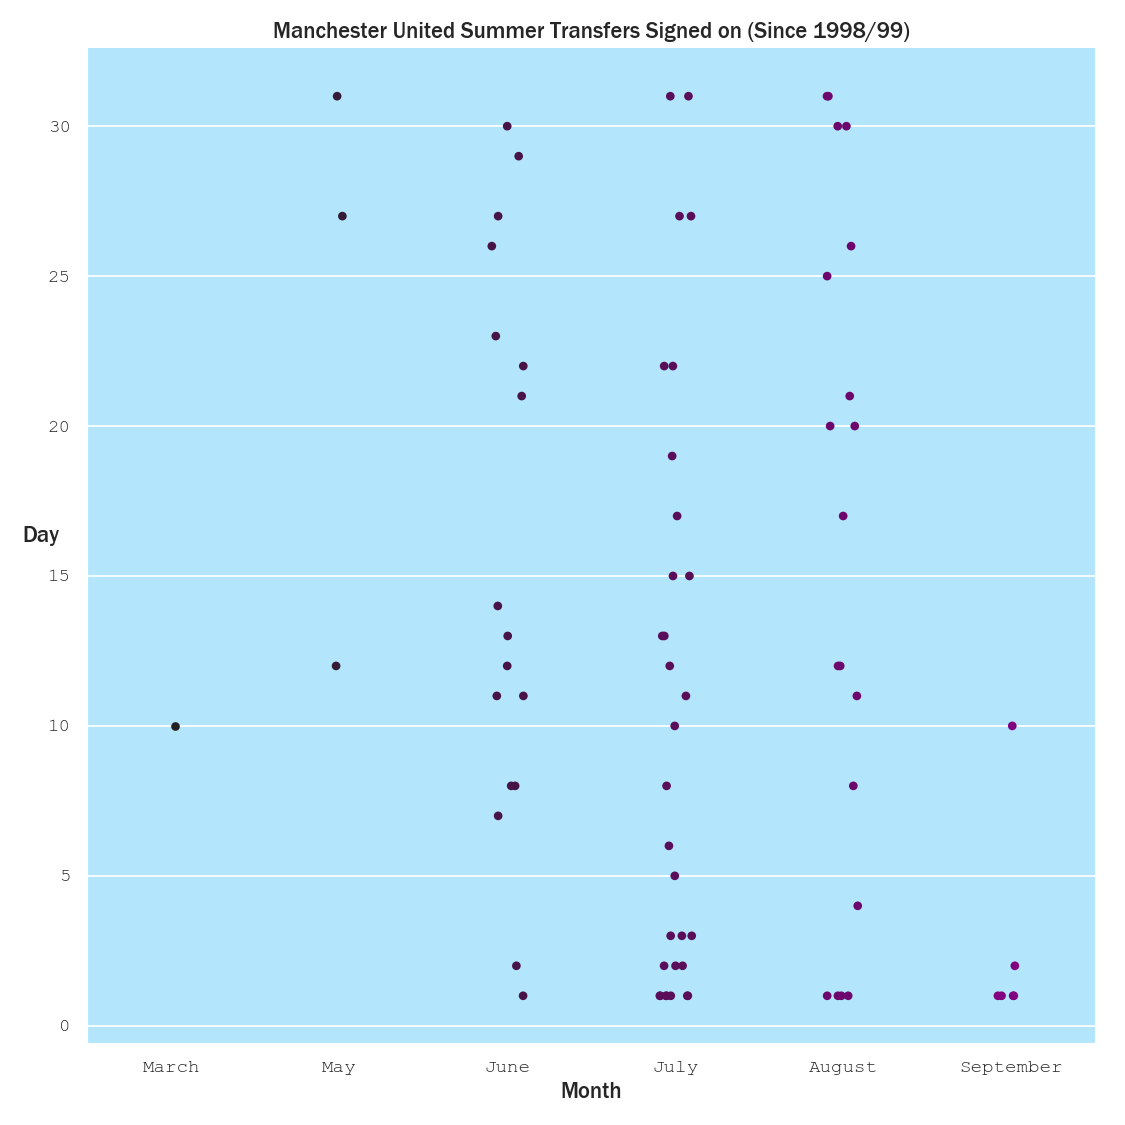

In [55]:
#Scatter Plot of transfers

sns.set()
#sns.set_palette("Blacks_d")

sns.set_style("darkgrid", {"axes.facecolor": "#b3e5fc"})
ord = ['March', 'May', 'June', 'July', 'August', 'September']
sns.catplot(x = "MonthName", y = "Day", data = df, order = ord, palette=sns.dark_palette("purple"), height = 9)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Month", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Day", rotation = 0, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Manchester United Summer Transfers Signed on (Since 1998/99)", family ="Franklin Gothic Medium", fontsize = 13 )

plt.tight_layout()
fig = plt.gcf()
fig.savefig("transfer_scatter.jpg", dpi = 500)

In [56]:
#Count plot for months

sns.set(rc={'figure.figsize':(14, 11)})
sns.set_palette("Reds_d")
sns.set_style("darkgrid", {"axes.facecolor": "#b3e5fc"})

sns.catplot(x = "MonthName", kind = "count",palette=sns.dark_palette("purple"), order = ord, data = df, height = 10)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Month", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Count", rotation = 0, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Manchester United Summer Transfers Signed on (Since 1998/99)", family ="Franklin Gothic Medium", fontsize = 13 )

plt.tight_layout()
fig = plt.gcf()

fig.savefig('count_month.jpg', dpi = 500)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


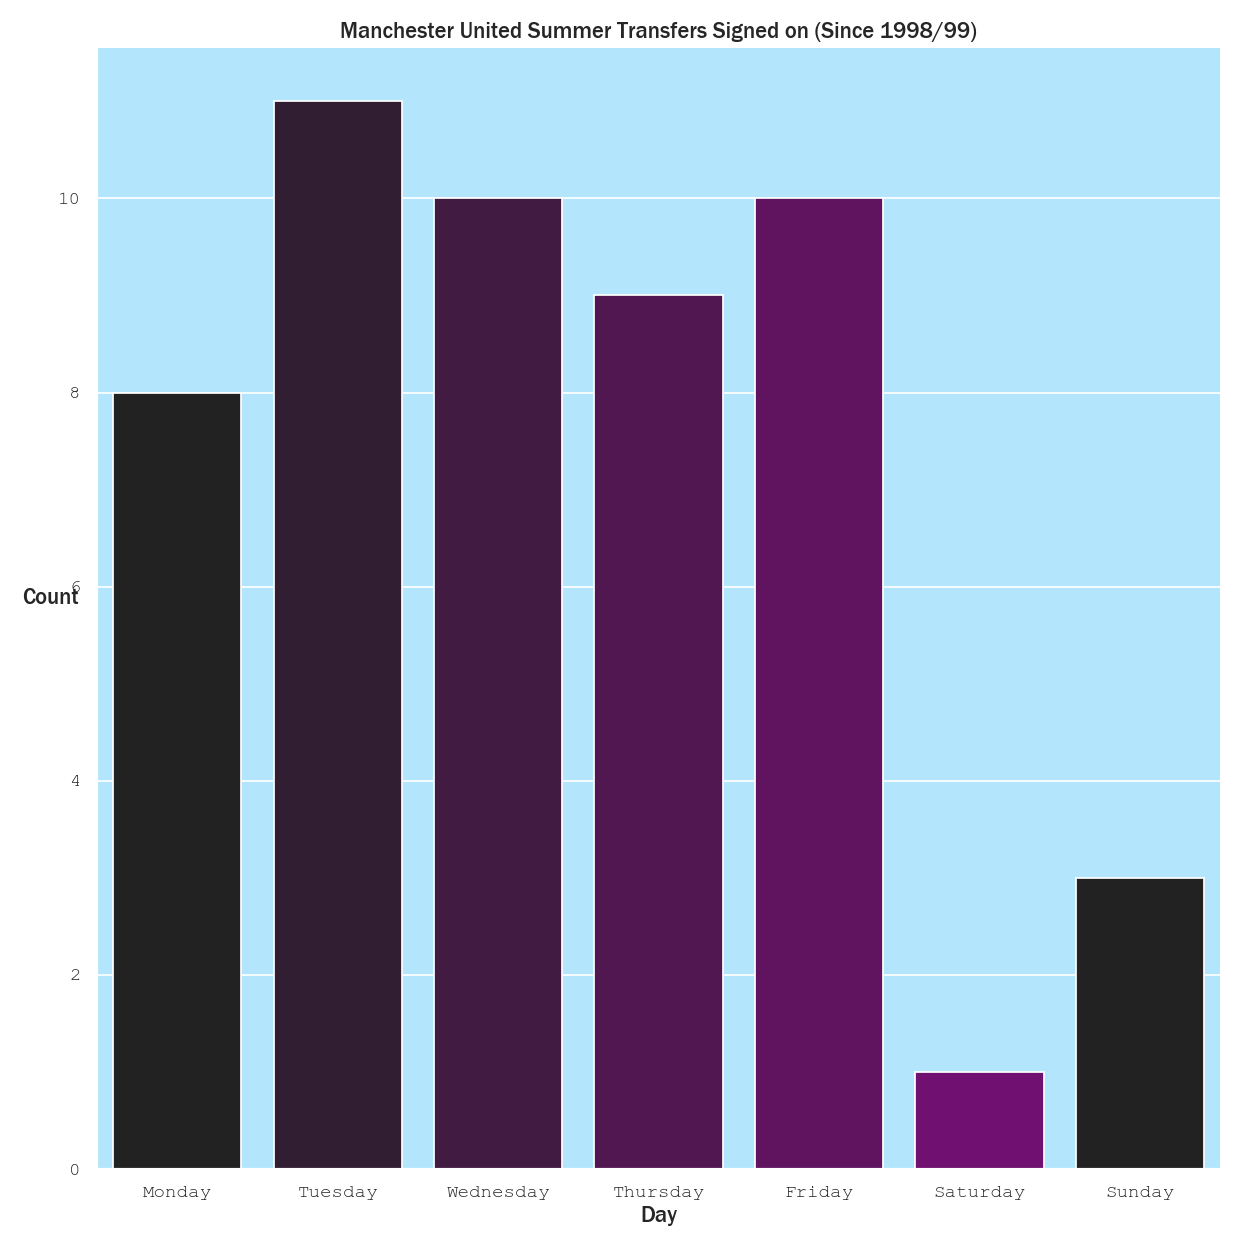

In [51]:
#Count plot for days

sns.set()
sns.set_palette(palette=sns.dark_palette("purple"))
sns.set_style("darkgrid", {"axes.facecolor": "#b3e5fc"})

od = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.catplot(x = "DayName", kind = "count",palette=sns.dark_palette("purple"), order = od, data = df, height = 10)

ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), family = "Courier New", fontsize = 11)
ax.set_yticklabels(ax.get_yticklabels(), family = "Courier New", fontsize = 11)

ax.set_xlabel("Day", family = "Franklin Gothic Medium", fontsize = 13)
ax.set_ylabel("Count", rotation = 0, family = "Franklin Gothic Medium", fontsize = 13)

ax.set_title("Manchester United Summer Transfers Signed on (Since 1998/99)", family ="Franklin Gothic Medium", fontsize = 13 )

plt.tight_layout()

fig = plt.gcf()

fig.savefig('count_day.jpg', dpi = 500)

In [35]:
df[df['Month'] == 9]

,Player,Club,Amount,Date,DayName,MonthName,Year,Day,Month
12,Regan Poole,Newport Co,"£100,000",2015-09-01,Tuesday,September,2015,1,9
13,Anthony Martial,Monaco,"£36,000,000",2015-09-01,Tuesday,September,2015,1,9
22,Daley Blind,Ajax,"£13,800,000",2014-09-01,Monday,September,2014,1,9
25,Marouane Fellaini,Everton,"£27,500,000",2013-09-02,Monday,September,2013,2,9


In [ ]:
df

Considering the fact that we are making so many early moves this early in summer, I was wondering how we operated usually. Scraping data for the past 20 Years, revealed some interested thoughts.

1. We've only ever signed 3 Players in May
2. The last time we signed a player in May, it was Alan Smith from Leeds. 15 YEARS ago.
3. July is the month we are most active in, followed by August (likely to change considering the new transfer deadlines)
4. Least likely to announce signings over the weekends (sort of obvious)

TLDR : Considering James's signings has been all but officially confirmed, I think this is a really positive start.

